In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo
import data_describe as dd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('../data/S&P 500 Communication Services 100-Day.csv')
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)
data = data.sort_values(by=['date'])
data = data.dropna()
data

,date,S&P 500,S&P 500 Real Estate (Sector),S&P 500 Performance (%),S&P 500 Communication Services (Sector) Performance (%),S&P 500 Communication Services (Sector) Outperform/Underperform,overall,communication,information technology commodities,education and communication commodities,education and communication services
4178,2009-12-02,1109.24,112.279999,-6.892963,5.407437,OUTPERFORM,217.488,84.972,100.047,100.150,100.083
4179,2009-12-03,1099.92,112.510002,-8.854969,4.748159,OUTPERFORM,217.488,84.972,100.047,100.150,100.083
4180,2009-12-04,1105.98,112.750000,-6.801271,5.729558,OUTPERFORM,217.488,84.972,100.047,100.150,100.083
4181,2009-12-07,1103.25,114.540001,-8.235323,6.252317,OUTPERFORM,217.488,84.972,100.047,100.150,100.083
4182,2009-12-08,1091.94,113.620003,-6.958078,7.168465,OUTPERFORM,217.488,84.972,100.047,100.150,100.083
...,...,...,...,...,...,...,...,...,...,...,...
7194,2021-11-24,4701.46,271.019989,5.426902,23.866538,OUTPERFORM,280.126,76.330,47.997,67.834,116.681
7195,2021-11-26,4594.62,265.980011,4.573863,24.569130,OUTPERFORM,280.126,76.330,47.997,67.834,116.681
7196,2021-11-29,4655.27,268.959991,8.977288,30.259587,OUTPERFORM,280.126,76.330,47.997,67.834,116.681
7197,2021-11-30,4567.00,260.899994,6.305224,24.457371,OUTPERFORM,280.126,76.330,47.997,67.834,116.681


## Using all data

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dow'] = data['date'].dt.dayofweek
data = data[data['dow']==3].groupby(['year','month']).nth[1].reset_index()
data

,year,month,date,S&P 500,S&P 500 Real Estate (Sector),S&P 500 Performance (%),S&P 500 Communication Services (Sector) Performance (%),S&P 500 Communication Services (Sector) Outperform/Underperform,overall,communication,information technology commodities,education and communication commodities,education and communication services,dow
0,2009,12,2009-12-10,1102.35,114.449997,-2.286930,10.750921,OUTPERFORM,217.488,84.972,100.047,100.150,100.083,3
1,2010,1,2010-01-14,1148.46,108.800003,8.787618,5.100470,UNDERPERFORM,217.281,84.849,99.258,99.904,100.205,3
2,2010,2,2010-02-11,1078.47,103.440002,1.716544,0.242272,UNDERPERFORM,217.353,84.868,99.067,99.781,100.441,3
3,2010,3,2010-03-11,1150.24,106.089996,2.657837,-5.513006,UNDERPERFORM,217.403,84.840,98.406,99.447,100.672,3
4,2010,4,2010-04-08,1186.44,107.980003,13.110628,-3.017777,UNDERPERFORM,217.290,84.738,97.553,99.069,100.829,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,7,2021-07-08,4320.82,265.809998,-7.184331,-1.171175,OUTPERFORM,273.092,76.056,48.787,68.796,115.826,3
140,2021,8,2021-08-12,4460.83,276.720001,-6.940799,3.222924,OUTPERFORM,274.214,76.337,49.162,69.155,116.228,3
141,2021,9,2021-09-09,4493.28,285.880005,-1.171440,12.724263,OUTPERFORM,276.590,76.407,48.847,68.823,116.446,3
142,2021,10,2021-10-14,4438.26,271.589996,3.749053,20.444361,OUTPERFORM,278.524,76.317,48.278,68.130,116.565,3


In [4]:
original = data[['S&P 500 Communication Services (Sector) Outperform/Underperform','month','overall','communication',\
                'information technology commodities','education and communication commodities',\
                'education and communication services']]

In [5]:
data.drop(columns=['date','S&P 500 Communication Services (Sector) Outperform/Underperform','year'], inplace=True)
data.head()

,month,S&P 500,S&P 500 Real Estate (Sector),S&P 500 Performance (%),S&P 500 Communication Services (Sector) Performance (%),overall,communication,information technology commodities,education and communication commodities,education and communication services,dow
0,12,1102.35,114.449997,-2.286930,10.750921,217.488,84.972,100.047,100.150,100.083,3
1,1,1148.46,108.800003,8.787618,5.100470,217.281,84.849,99.258,99.904,100.205,3
2,2,1078.47,103.440002,1.716544,0.242272,217.353,84.868,99.067,99.781,100.441,3
3,3,1150.24,106.089996,2.657837,-5.513006,217.403,84.840,98.406,99.447,100.672,3
4,4,1186.44,107.980003,13.110628,-3.017777,217.290,84.738,97.553,99.069,100.829,3


In [6]:
original['Performance'] = np.where(original['S&P 500 Communication Services (Sector) Outperform/Underperform'] == 'OUTPERFORM',1,0)
original = original[['Performance','month','overall','communication',\
                'information technology commodities','education and communication commodities',\
                'education and communication services']]

In [7]:
dd.data_summary(original)

,Info
Rows,144
Columns,7
Size in Memory,8.0 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,1,1,0.62,0.49,2,89
month,int64,0,0,1,6.50,12,6.50,3.45,12,12
overall,float64,0,0,217.20,238.025,280.13,241.74,14.75,142,2
communication,float64,0,0,72.92,79.92,84.97,78.97,4.10,142,2
information technology commodities,float64,0,0,46.58,61.98,100.047,66.77,15.78,144,1
education and communication commodities,float64,0,0,66.13,81.50,100.15,82.43,10.090,144,1
education and communication services,float64,0,0,100.083,109.15,116.68,108.65,4.11,144,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

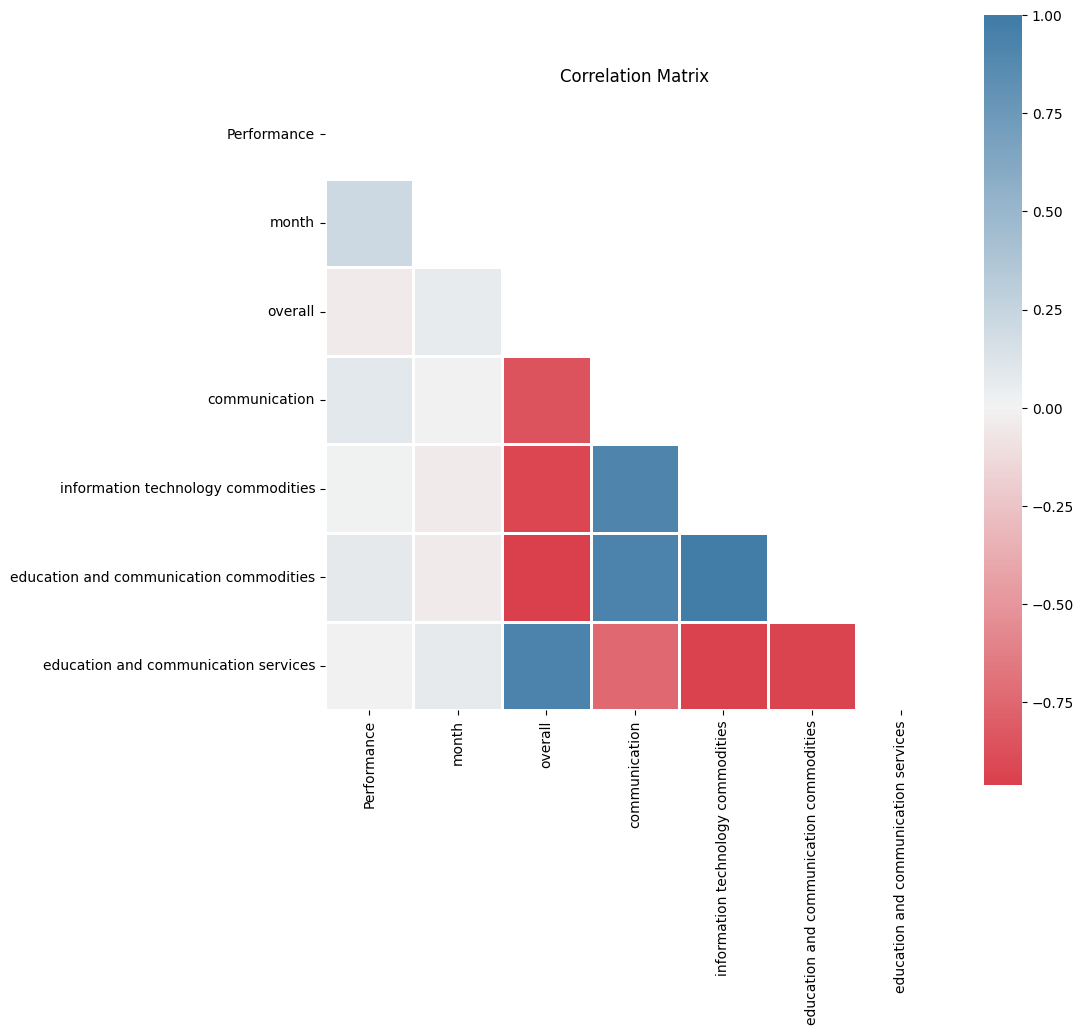

In [8]:
dd.correlation_matrix(original)

### Conditional GAN

In [9]:
discrete_columns = [
    'month'
]

ctgan = CTGAN(epochs=5000)
ctgan.fit(data, discrete_columns)

# Synthetic copy
samples = ctgan.sample(10000)
samples

,month,S&P 500,S&P 500 Real Estate (Sector),S&P 500 Performance (%),S&P 500 Communication Services (Sector) Performance (%),overall,communication,information technology commodities,education and communication commodities,education and communication services,dow
0,3,1501.424624,150.695957,-3.232333,-1.086932,225.752058,80.013931,77.161715,94.807618,111.152855,3
1,11,2411.552707,138.937517,-2.189096,-2.624759,270.725795,73.906117,50.471353,75.249990,109.872834,3
2,6,1077.057531,108.069844,-4.291163,2.552118,229.097066,84.568757,94.615611,100.921162,102.298815,3
3,2,4048.676711,170.003758,-7.446870,-11.578885,259.300153,76.379397,51.725991,72.663394,109.760115,3
4,3,4422.707191,227.158597,-11.751112,-12.092621,270.213031,75.265614,48.544781,63.437798,112.872493,3
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,2909.737737,150.890052,-2.738590,-3.666760,241.289900,73.157607,58.559314,83.073758,109.948552,3
9996,3,2137.891603,139.108601,-4.018369,-7.660620,221.195339,82.141687,81.699486,92.195673,101.056090,3
9997,5,4187.393185,221.959861,-10.346395,-8.776025,272.139757,75.228449,51.910326,65.968832,114.253693,3
9998,1,1204.535388,147.928006,-2.607662,3.476024,216.546733,83.753521,85.904416,94.160291,102.910325,3


In [10]:
samples['Performance'] = np.where(samples['S&P 500 Communication Services (Sector) Performance (%)'] > \
                                  samples['S&P 500 Performance (%)'], 1, 0)

In [11]:
samples = samples[['Performance','month', 'overall','communication',\
                'information technology commodities','education and communication commodities',\
                'education and communication services']]
samples.head()

,Performance,month,overall,communication,information technology commodities,education and communication commodities,education and communication services
0,1,3,225.752058,80.013931,77.161715,94.807618,111.152855
1,0,11,270.725795,73.906117,50.471353,75.249990,109.872834
2,1,6,229.097066,84.568757,94.615611,100.921162,102.298815
3,0,2,259.300153,76.379397,51.725991,72.663394,109.760115
4,0,3,270.213031,75.265614,48.544781,63.437798,112.872493


In [12]:
dd.data_summary(samples)

,Info
Rows,10000
Columns,7
Size in Memory,547.0 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,1,1,0.64,0.48,2,6382
month,int64,0,0,1,7,12,6.53,3.48,12,882
overall,float64,0,0,204.40,238.21,294.12,240.94,16.94,10000,1
communication,float64,0,0,70.21,80.30,86.96,79.011,3.92,9999,2
information technology commodities,float64,0,0,36.21,70.50,117.59,68.92,16.23,10000,1
education and communication commodities,float64,0,0,54.82,80.76,106.28,82.89,11.11,10000,1
education and communication services,float64,0,0,98.24,108.77,118.20,107.73,4.24,9999,2


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

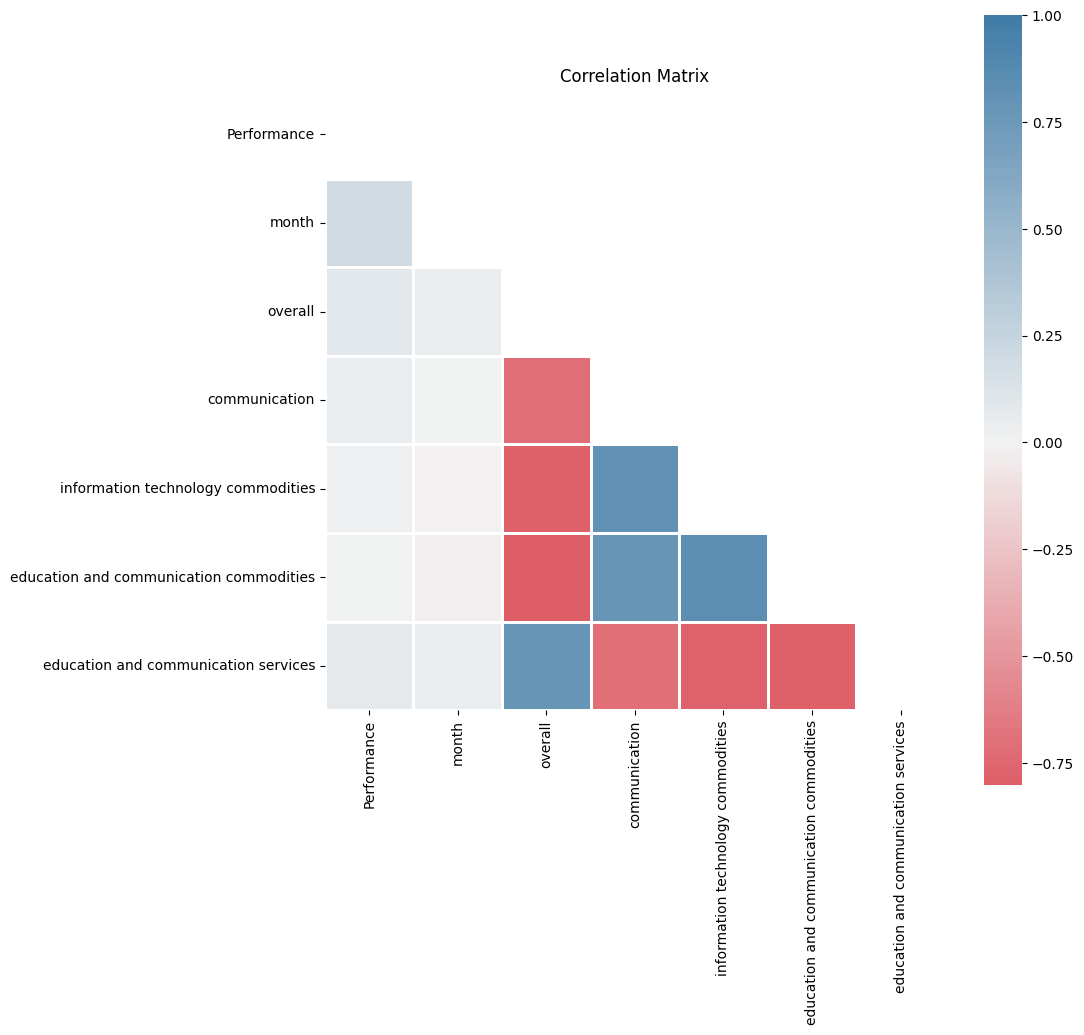

In [13]:
dd.correlation_matrix(samples)

In [14]:
X = samples.drop(['Performance'],axis=1)
y = samples['Performance']

### SMOTE Oversampling

In [15]:
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({1: 6382, 0: 3618})
Counter({1: 6382, 0: 6382})


### Interaction Terms

In [16]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_poly = poly.fit_transform(X.drop(['month'],axis=1))
X_poly

array([[  225.75205845,    80.01393054,    77.16171456, ...,
         7315.51838597,  8576.74487184, 10538.13745928],
       [  270.72579547,    73.90611697,    50.47135291, ...,
         3797.96880915,  5545.43056287,  8267.92964888],
       [  229.09706622,    84.56875737,    94.6156108 , ...,
         9548.71737364,  9679.06485863, 10324.11526131],
       ...,
       [  221.31836209,    83.67488914,    89.46315528, ...,
         8634.45219234,  9121.44586138,  9840.33880395],
       [  270.07436649,    76.36225417,    47.02643894, ...,
         3010.29076332,  5432.7641636 ,  7395.11807041],
       [  212.89707078,    83.89981652,    84.18670149, ...,
         8520.80172555,  8685.08396304, 10441.61060904]])

In [17]:
month = X['month'].to_numpy()
month = np.reshape(month,(-1,1))
X = np.append(X_poly,month,1)
X.shape

(12764, 16)

In [18]:
X_real = original.drop(['Performance'],axis=1)
y_real = original['Performance']
X_real_poly = poly.fit_transform(X_real.drop(['month'],axis=1))
month = X_real['month'].to_numpy()
month = np.reshape(month,(-1,1))
X_real = np.append(X_real_poly,month,1)
X_real.shape

(144, 16)

In [19]:
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X_real = stscaler.transform(X_real)

### Training with CV

In [20]:
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(GaussianNB())

k_fold = StratifiedKFold(n_splits=10)

Model_Comparison = pd.DataFrame(columns=['Name', 'CV Mean Accuracy', 'CV Mean Precision', 'CV Mean Recall',\
                                         'CV Mean F-1 Score', \
                                         'Accuracy', 'Precision', 'Recall', 'F-1 Score',\
                                        'Accuracy Real', 'Precision Real', 'Recall Real', 'F-1 Score Real'])
row = 0
for clf in classifiers:
    name = clf.__class__.__name__
    Model_Comparison.loc[row, 'Name'] = name
    
    Model_Comparison.loc[row, 'CV Mean Accuracy'] = cross_val_score(clf, X, y, scoring = 'accuracy', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Precision'] = cross_val_score(clf, X, y, scoring = 'precision',\
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Recall'] = cross_val_score(clf, X, y, scoring = 'recall', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean F-1 Score'] = cross_val_score(clf, X, y, scoring = 'f1', \
                                                                 cv = k_fold, n_jobs = 10).mean()

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    Model_Comparison.loc[row, 'Accuracy'] = accuracy_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Precision'] = precision_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Recall'] = recall_score(y_test, y_pred)
    Model_Comparison.loc[row, 'F-1 Score'] = f1_score(y_test, y_pred)
    
    y_pred = clf.predict(X_real)
    Model_Comparison.loc[row, 'Accuracy Real'] = accuracy_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Precision Real'] = precision_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Recall Real'] = recall_score(y_real, y_pred)
    Model_Comparison.loc[row, 'F-1 Score Real'] = f1_score(y_real, y_pred)
    
    row += 1
Model_Comparison

,Name,CV Mean Accuracy,CV Mean Precision,CV Mean Recall,CV Mean F-1 Score,Accuracy,Precision,Recall,F-1 Score,Accuracy Real,Precision Real,Recall Real,F-1 Score Real
0,KNeighborsClassifier,0.704493,0.744832,0.632563,0.682633,0.692573,0.732323,0.624615,0.674195,0.555556,0.654321,0.595506,0.623529
1,DecisionTreeClassifier,0.676522,0.690744,0.650108,0.668315,0.663428,0.67878,0.643692,0.660771,0.611111,0.698795,0.651685,0.674419
2,RandomForestClassifier,0.764269,0.798957,0.718581,0.754249,0.760263,0.790934,0.719385,0.753464,0.659722,0.704082,0.775281,0.737968
3,AdaBoostClassifier,0.687484,0.682711,0.70276,0.692362,0.685365,0.689908,0.694154,0.692025,0.645833,0.731707,0.674157,0.701754
4,GradientBoostingClassifier,0.698218,0.694529,0.709812,0.701862,0.694453,0.698655,0.703385,0.701012,0.625,0.705882,0.674157,0.689655
5,ExtraTreesClassifier,0.78566,0.821738,0.744435,0.778216,0.769038,0.791721,0.741538,0.765809,0.638889,0.694737,0.741573,0.717391
6,BaggingClassifier,0.73426,0.780936,0.659191,0.713354,0.710436,0.749112,0.648615,0.695251,0.597222,0.696203,0.617978,0.654762
7,SVC,0.668368,0.678436,0.641807,0.659421,0.665935,0.684732,0.637538,0.660293,0.666667,0.766234,0.662921,0.710843
8,GaussianNB,0.628567,0.629742,0.624887,0.627176,0.622689,0.63607,0.605538,0.620429,0.659722,0.743902,0.685393,0.71345


### Voting Classifier

In [21]:
et_clf = ExtraTreesClassifier(random_state=random_state)
bag_clf = BaggingClassifier(random_state=random_state)
rf_clf = RandomForestClassifier(random_state=random_state)
classifiers = [('RF', rf_clf), \
               ('ET', et_clf),\
              ('Bagging', bag_clf)]

vc = VotingClassifier(estimators = classifiers, voting = 'soft')     
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
vc_res = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-1 Score'])
vc_res.loc[0, 'Accuracy'] = accuracy_score(y_test, y_pred)
vc_res.loc[0, 'Precision'] = precision_score(y_test, y_pred)
vc_res.loc[0, 'Recall'] = recall_score(y_test, y_pred)
vc_res.loc[0, 'F-1 Score'] = f1_score(y_test, y_pred)
vc_res

,Accuracy,Precision,Recall,F-1 Score
0,0.75807,0.78189,0.728,0.753983
